# 2.1 Importações

In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), '../../') if '__file__' in globals() else '../../')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from src.util import dados_limpos_Sexo_do_Responsavel

In [2]:
df = pd.read_csv("../../data/raw/DH_2022_Br_Regioes_20240423.xlsx - Sexo do Respontável.csv")
df_regioes, df_brasil = dados_limpos_Sexo_do_Responsavel(df)

# 2.2 Panorama nacional

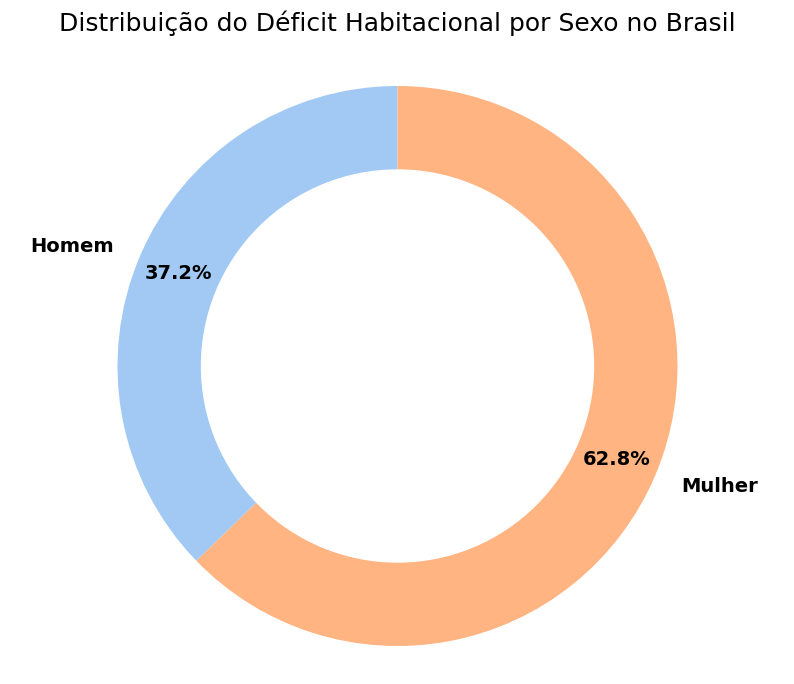

In [3]:
dados_grafico_pizza = df_brasil[df_brasil['sexo'] != 'Ignorado']

plt.figure(figsize=(10, 8))
cores = sns.color_palette("pastel")[0:2]

plt.pie(
    dados_grafico_pizza['deficit_total'],
    labels=dados_grafico_pizza['sexo'],
    colors=cores,
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,
    textprops={'fontsize': 14, 'fontweight': 'bold'}
)

circulo_central = plt.Circle((0,0), 0.70, color='white')
fig = plt.gcf()
fig.gca().add_artist(circulo_central)

plt.title('Distribuição do Déficit Habitacional por Sexo no Brasil', fontsize=18, pad = 20)
plt.axis('equal')
plt.show()

# 2.3 Análise Regional

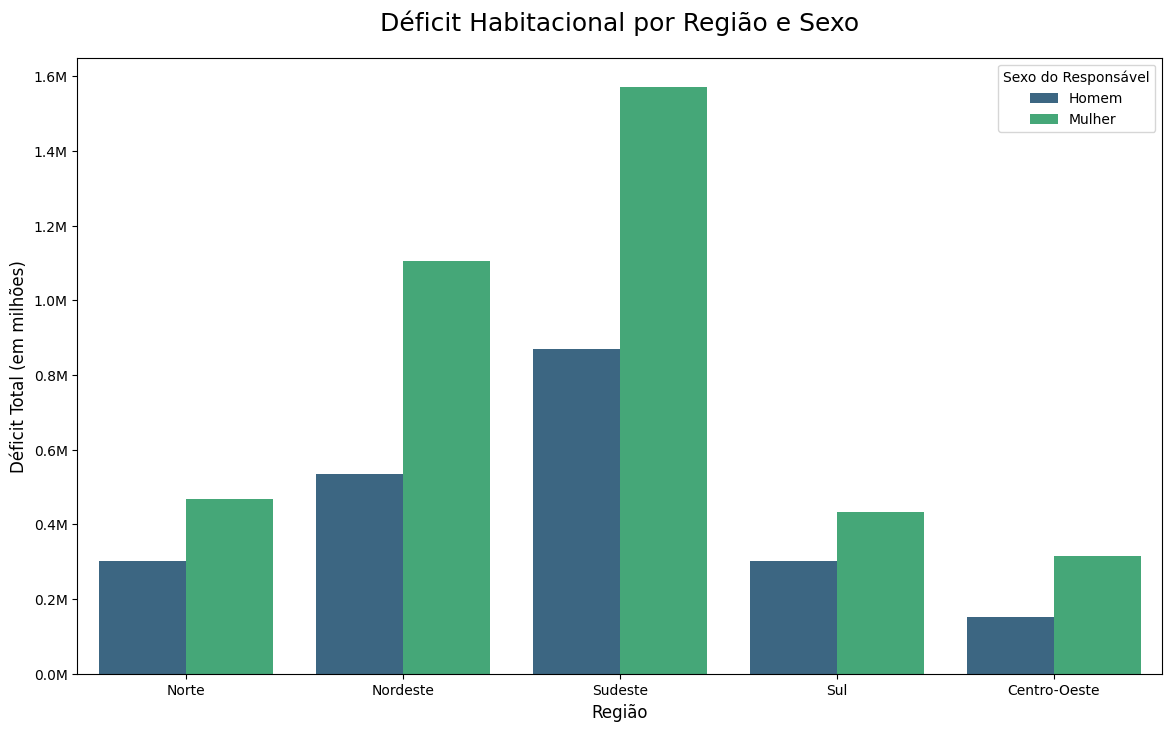

In [5]:
df_regioes_comp = df_regioes[df_regioes['sexo'] != 'Ignorado'].copy()

plt.figure(figsize=(14,8))

sns.barplot(
    data = df_regioes_comp,
    x = 'regiao',
    y = 'deficit_total',
    hue = 'sexo',
    palette = 'viridis'
)

plt.title('Déficit Habitacional por Região e Sexo', fontsize=18, pad = 20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Déficit Total (em milhões)', fontsize=12)
plt.xticks(rotation=0)

formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Sexo do Responsável')
plt.show()

# 2.4 Ánalise dos componentes

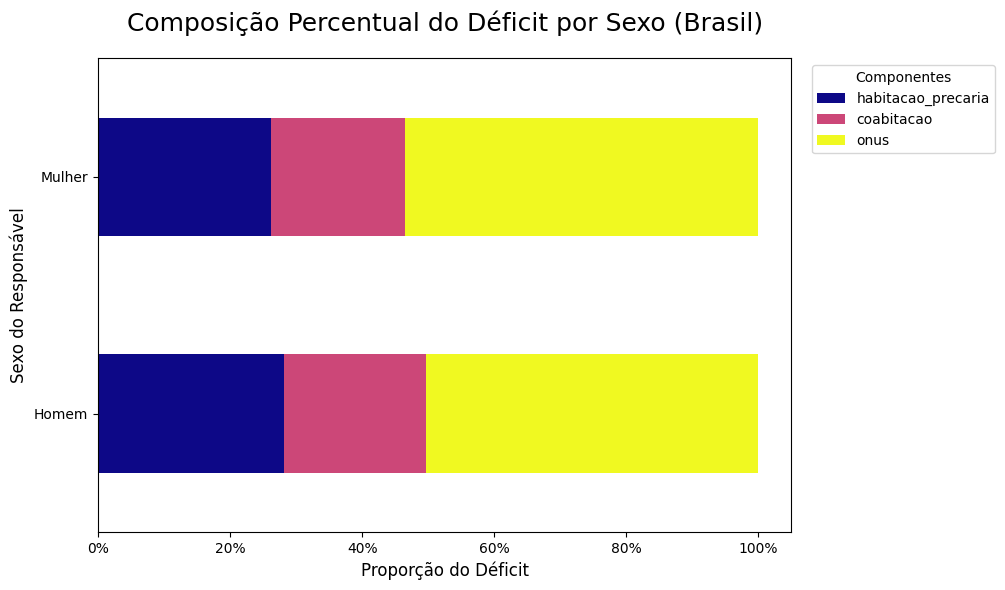

In [6]:
componentes_sexo = df_brasil[df_brasil['sexo'] != 'Ignorado'].copy()
componentes_sexo = componentes_sexo.set_index('sexo')[['habitacao_precaria', 'coabitacao', 'onus']]

componentes_percentual = componentes_sexo.div(componentes_sexo.sum(axis=1), axis=0)

componentes_percentual.plot(
    kind='barh', 
    stacked=True, 
    figsize=(12, 6), 
    colormap='plasma'
)

plt.title('Composição Percentual do Déficit por Sexo (Brasil)', fontsize=18, pad=20)
plt.xlabel('Proporção do Déficit', fontsize=12)
plt.ylabel('Sexo do Responsável', fontsize=12)
plt.legend(title='Componentes', bbox_to_anchor=(1.02, 1), loc='upper left')

formatter = plt.FuncFormatter(lambda x, pos: f'{x:.0%}')
plt.gca().xaxis.set_major_formatter(formatter)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()